Importing Libaries

In [31]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score


Loading Dataset

In [2]:
#Airline Dataset Loaded
df = pd.read_csv("Airline.csv")

#Getting the first 10 rows
df.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Exploratoary Data Analysis

In [3]:
#Getting the last 10 rows
df.tail(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129870,satisfied,disloyal Customer,70,Personal Travel,Eco,1674,5,4,5,1,...,5,5,3,2,4,5,4,5,54,46.0
129871,satisfied,disloyal Customer,35,Personal Travel,Eco,3287,5,4,5,3,...,2,2,4,5,4,4,3,2,9,0.0
129872,satisfied,disloyal Customer,69,Personal Travel,Eco,2240,5,4,5,3,...,4,4,5,4,4,3,4,4,4,0.0
129873,satisfied,disloyal Customer,63,Personal Travel,Eco,1942,5,5,4,4,...,3,3,5,2,5,3,5,3,7,NaN
129874,satisfied,disloyal Customer,11,Personal Travel,Eco,2752,5,5,5,2,...,2,2,3,5,3,5,4,2,5,0.0
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,3,...,3,4,5,5,5,3,3,3,185,186.0


In [4]:
#getting the shape
df.shape

(129880, 22)

In [5]:
#Getting all the data types
df.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [6]:
#Getting the size of data
df.size

2857360

Exploring the dataset and there datatypes

In [7]:
#Gettng the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

Data visualization

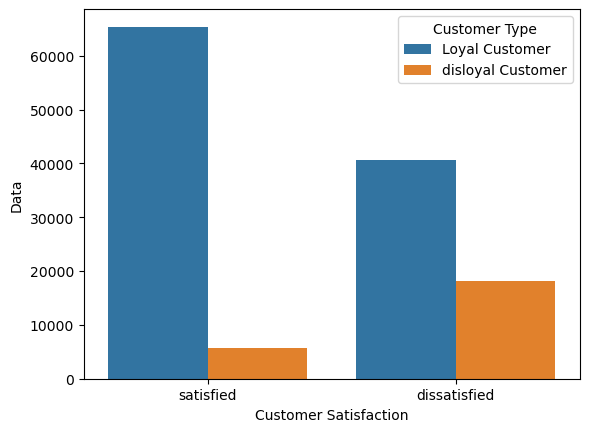

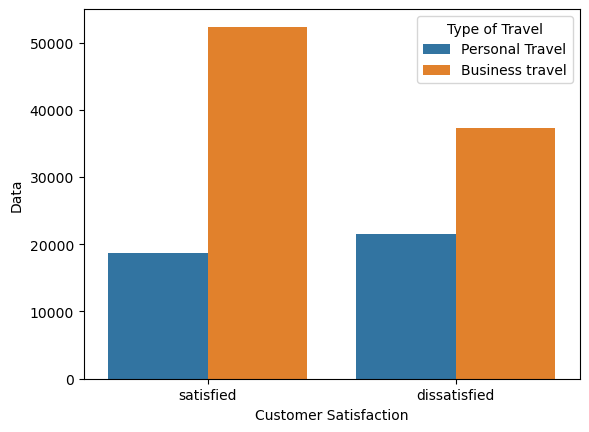

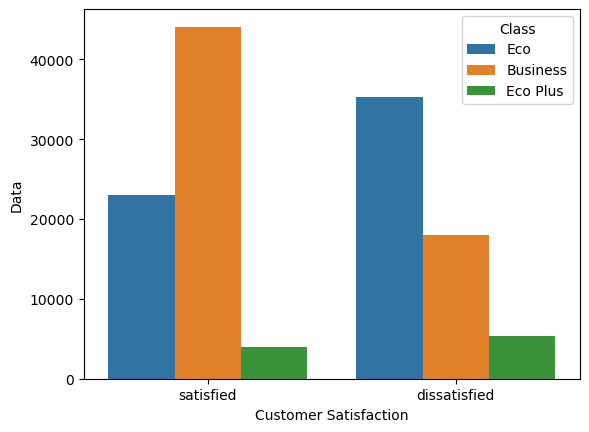

In [8]:

sns.countplot(x="satisfaction", hue="Customer Type", data=df)
plt.xlabel("Customer Satisfaction")
plt.ylabel("Data")
plt.show()

sns.countplot(x="satisfaction", hue="Type of Travel",data=df)
plt.xlabel("Customer Satisfaction")
plt.ylabel("Data")
plt.show()

sns.countplot(x="satisfaction", hue="Class",data=df)
plt.xlabel("Customer Satisfaction")
plt.ylabel("Data")
plt.show()

Data cleaning

In [9]:
#Examine the dataset for null value
Missing_data=df.isnull().sum()
print(Missing_data)

print("-"*40)

#Percentage of missing value
Missing_percentage = (Missing_data[Missing_data>0]/df.shape[0]) *100
print(Missing_percentage)

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64
----------------------------------------
Arrival Delay in Minutes    0.302587
dtype: 

In [10]:
#Droppng the null value
df.dropna(inplace=True)

In [11]:
#Calculating the null value 
df.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [12]:
df.shape

(129487, 22)

In [13]:
#Identify Duplicates
duplicates= df.duplicated()
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
129875    False
129876    False
129877    False
129878    False
129879    False
Length: 129487, dtype: bool


In [14]:
#Count Duplicates
num_dupicates= duplicates.sum()
print(num_dupicates)

0


Analyzing Data

In [15]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,14.643385,15.091129
std,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,37.932867,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Data Preprocessing

In [16]:
df=df.drop(['Gate location','Flight Distance','Leg room service'],axis=1)

In [17]:
for x in df.select_dtypes(include="object"):
    print(df[x].value_counts())

satisfaction
satisfied       70882
dissatisfied    58605
Name: count, dtype: int64
Customer Type
Loyal Customer       105773
disloyal Customer     23714
Name: count, dtype: int64
Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64
Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64


Encoding Data

In [18]:
refactored_values={
    'satisfaction':{
        'satisfied':0,
        'dissatisfied':1
    },
    'Customer Type':{
        'Loyal Customer':0,
        'disloyal Customer':1
      
    },
    'Type of Travel':{
        'Business travel':0,
        'Personal Travel':1
       
    },
    'Class':{
        'Business':0,
        'Eco':1,
        'Eco Plus':2}}

df.replace(refactored_values, inplace=True)   

satisfaction
0    70882
1    58605
Name: count, dtype: int64


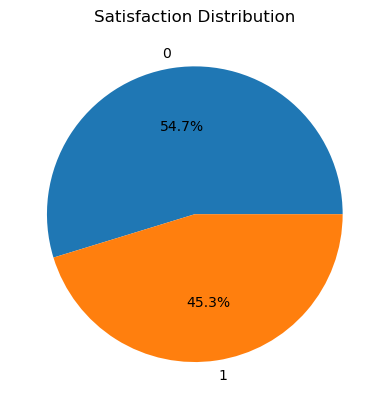

In [19]:
satisfaction_count=df['satisfaction'].value_counts()
print(satisfaction_count)

plt.pie(satisfaction_count,labels=satisfaction_count.index, autopct='%1.1f%%')
plt.title('Satisfaction Distribution')
plt.show()


According to the pie chart, satisfied passengers make up the higest percentage in the overall distribution, while dissatisfied account for a smaller percentage.

Age
7     0.548387
8     0.588903
9     0.592723
10    0.595122
11    0.576414
        ...   
77    0.801887
78    0.681818
79    0.730769
80    0.718182
85    0.760000
Name: satisfaction, Length: 75, dtype: float64


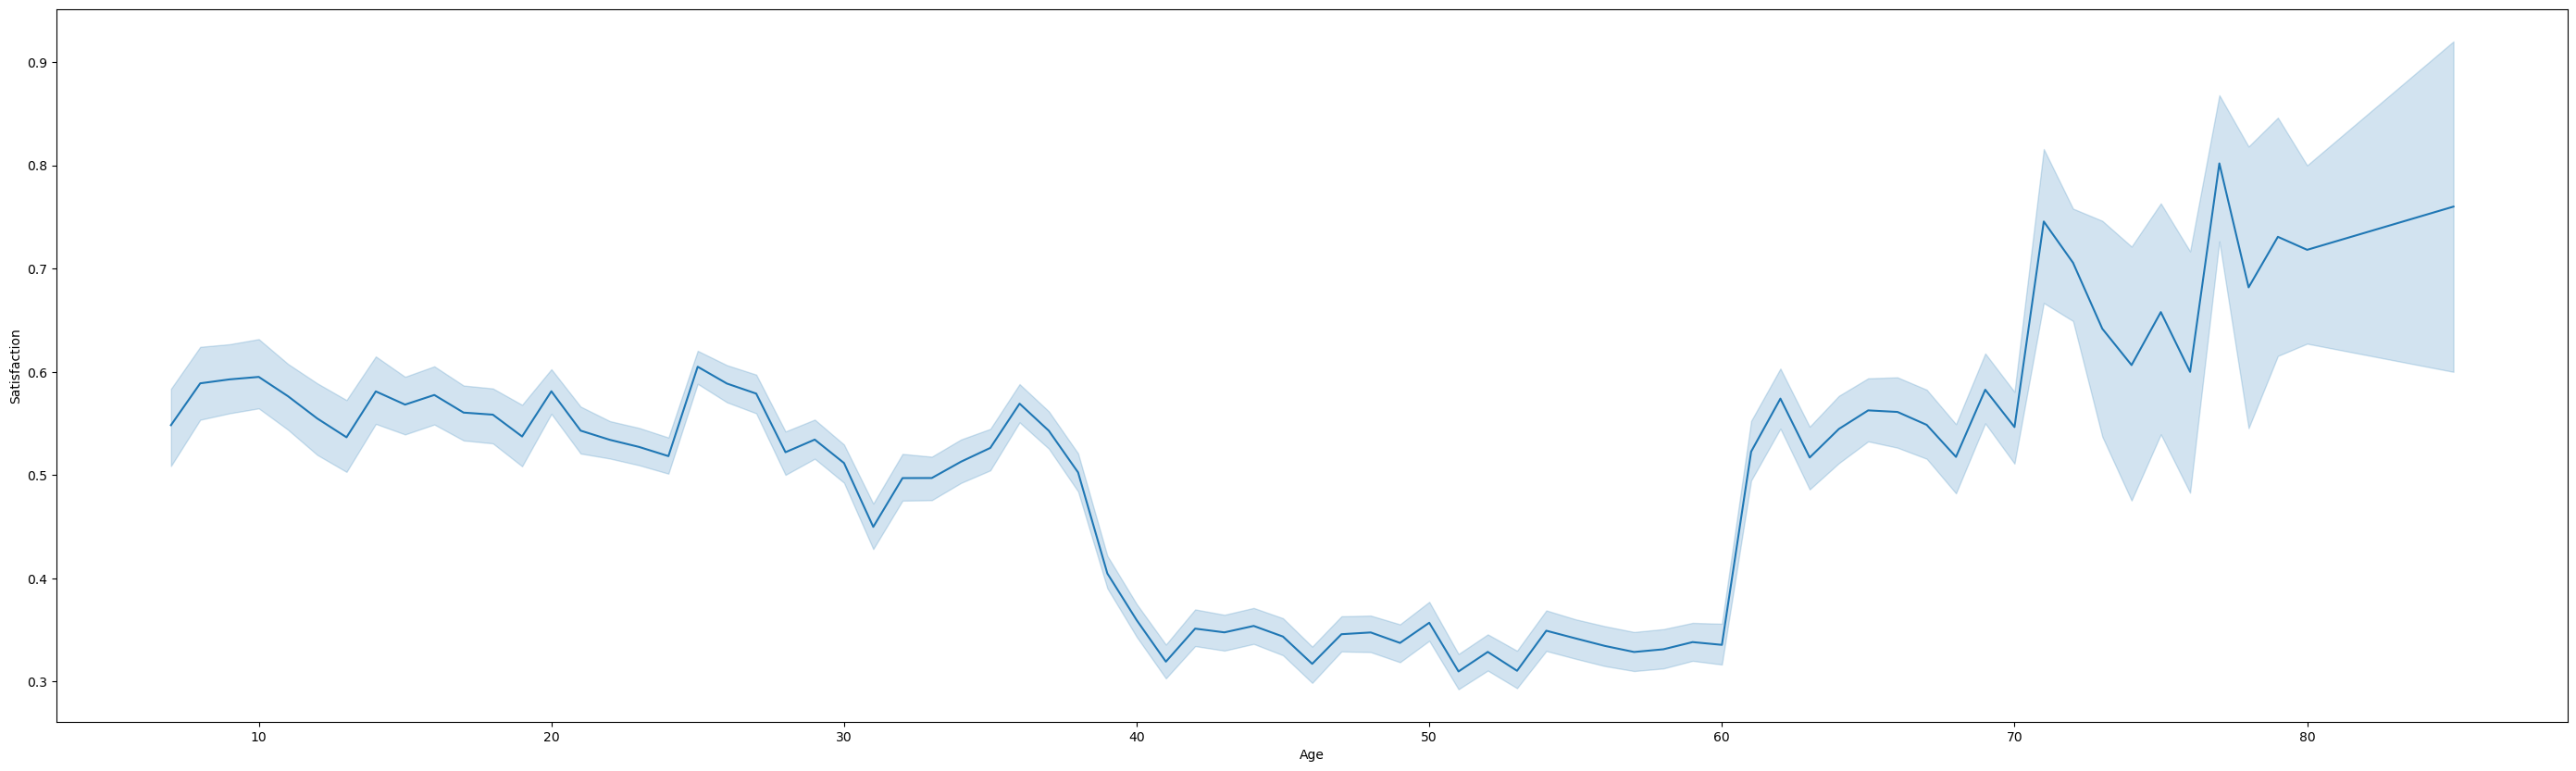

In [20]:
Age_satisfied=df.groupby('Age')['satisfaction'].mean()
print(Age_satisfied)

plt.figure(figsize=(35,10))
sns.lineplot(x='Age',y='satisfaction',data=df)
plt.xlabel('Age')
plt.ylabel('Satisfaction')
plt.show()

This analysis and visualization help us understand the relationship between age and satisfaction. By identifying trends and specific age groups with high or low satisfaction, we can tailor our strategies to improve overall satisfaction.

Class  satisfaction
0      0               43977
       1               18013
1      1               35219
       0               22898
2      1                5373
       0                4007
Name: count, dtype: int64


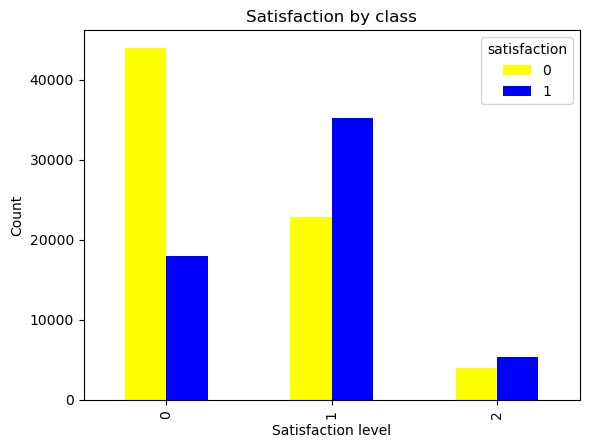

180

In [21]:
#Satisfaction vs Class
Satisfaction_by_class=df.groupby('Class')['satisfaction'].value_counts()
print(Satisfaction_by_class)

#Data visualization
Satisfaction_by_class.unstack().plot(kind='bar',color=['yellow','blue'])
plt.title('Satisfaction by class')
plt.xlabel('Satisfaction level')
plt.ylabel('Count')
plt.show()

180

The plot display the distribution of satisfaction levels for each class, most satisfied  people have business class and most disarisfied people have economy class while people travel in eco plus are neutral

Customer Type  satisfaction
0              0               65194
               1               40579
1              1               18026
               0                5688
Name: count, dtype: int64


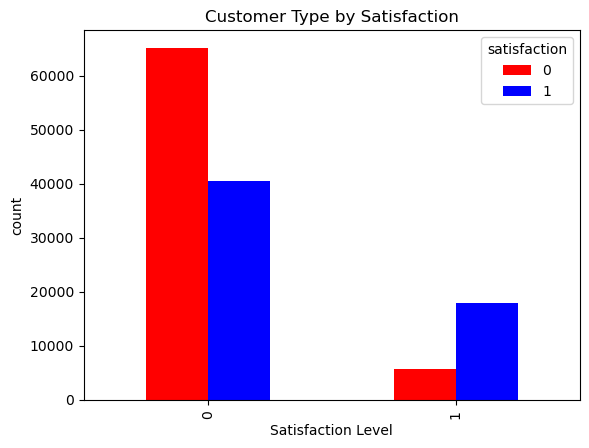

In [22]:
Customer_satisfaction=df.groupby('Customer Type')['satisfaction'].value_counts()
print(Customer_satisfaction)

Customer_satisfaction.unstack().plot(kind='bar',color=['red','blue'])
plt.title('Customer Type by Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('count')
plt.show()

The plot shows  Satisfaction level by  customer type ,it shows that loyal customer are more satisfied then disloyal customer.

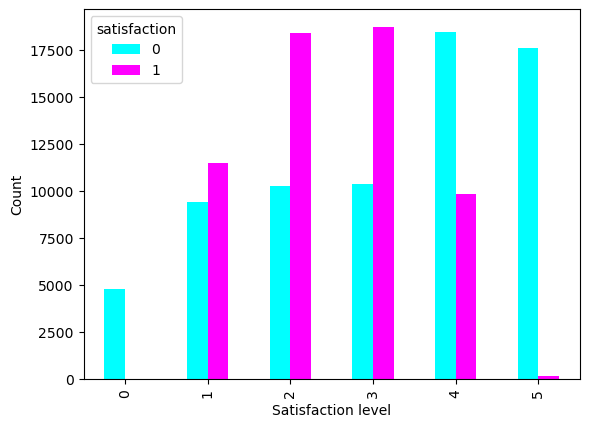

In [23]:
Seat_satisfaction=df.groupby('Seat comfort')['satisfaction'].value_counts()

Seat_satisfaction.unstack().plot(kind='bar',color=['cyan','magenta'])
plt.xlabel('Satisfaction level')
plt.ylabel('Count')
plt.show()


   Class  Cleanliness  Checkin service  Inflight wifi service  Food and drink  \
0      0     3.855235         3.525730               3.335425        2.926472   
1      1     3.582325         3.186985               3.168367        2.777156   
2      2     3.484435         3.070682               3.179638        2.823881   

   Baggage handling  
0          3.853331  
1          3.565222  
2          3.459062  


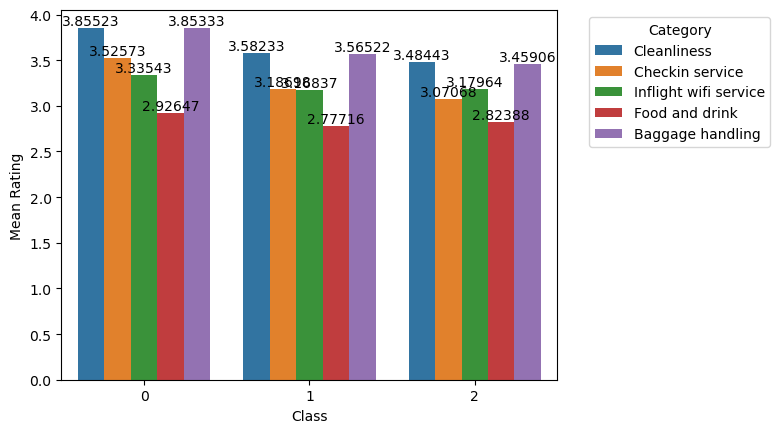

In [24]:
class_rating= df.groupby('Class').agg({'Cleanliness':'mean','Checkin service' : 'mean','Inflight wifi service':'mean','Food and drink':'mean','Baggage handling':'mean'}).reset_index()
print(class_rating)

class_rating_melted= pd.melt(class_rating, id_vars='Class', var_name='Category', value_name='Mean Rating')
ax = sns.barplot(x='Class', y='Mean Rating', hue='Category', data=class_rating_melted)


for c in ax.containers:
        ax.bar_label(c)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

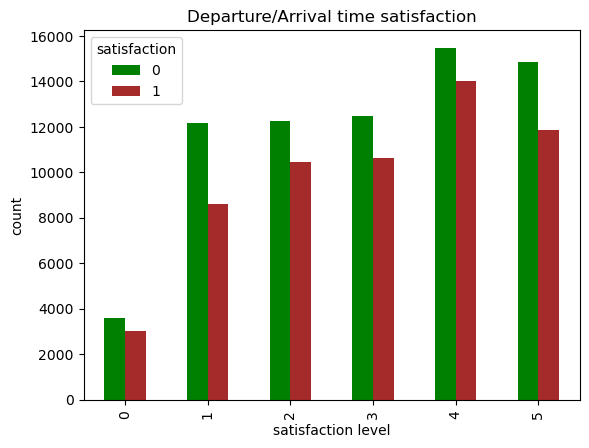

In [25]:
Departure_Arrival_time_satisfaction=df.groupby('Departure/Arrival time convenient')['satisfaction'].value_counts()

Departure_Arrival_time_satisfaction.unstack().plot(kind='bar',color=['green','brown'])
plt.title('Departure/Arrival time satisfaction')
plt.xlabel('satisfaction level')
plt.ylabel('count')
plt.show()


Machine Learning

In [26]:
from sklearn.model_selection import train_test_split
Selected_features=['Inflight entertainment','Departure/Arrival time convenient','Seat comfort','Departure Delay in Minutes']

X=df[Selected_features]
y=df['satisfaction']

#Data Splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f'X_train shape:{X_train.shape} ,y_train.shape{y_train.shape}')                                              
print(f'X_test shape:{X_test.shape} ,y_test.shape{y_test.shape}')                                               


X_train shape:(90640, 4) ,y_train.shape(90640,)
X_test shape:(38847, 4) ,y_test.shape(38847,)


In [32]:
from sklearn.metrics import mean_squared_error
model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print(y_pred)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error(RMSE);{rmse}')



[0 1 1 ... 1 1 1]
Root Mean Squared Error(RMSE);0.474732902320156


In [35]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.774629
Precision: 0.776347
Recall: 0.707466
F1 Score: 0.740308


Logistic regression accurately predicted satisfaction 77.4 percent of the time
The model is 77.4 percent accurate. This is an improvement over the datasets customer satisfaction rate of 54.7 percent.
The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results.
